---

# Decision and Regression Tree

## Introduction

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

<p>
    <img src="Decision_Tree.jpeg" width="500" align="center">
</p>

The nodes shown above fall under the following types of nodes:

* Root node — node at the top of the tree. This node acts as the input node for feature vectors in the model. 
* Decision nodes — nodes where the variables are evaluated. These nodes have arrows pointing to them and away from them
* Leaf nodes — final nodes at which the prediction is made

## Algorithm

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.

---

## Implement

To illustrate how decision trees work we will consider artificial binary classification data generated by the ```sklearn.datasets.make_moons()``` function.

First, let's the visualization of classification data.

### Implement 1 - Classification Tree

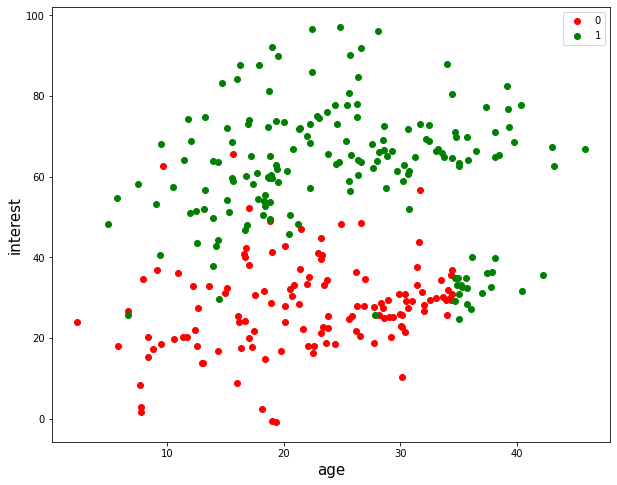

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split

# Import the data
df = pd.read_csv("classification.csv")
results = [0.0, 1.0]
colors = ["red", "green"]
fig, ax = plt.subplots(figsize = (10, 8))
for results, colors in zip(results, colors):
    temp_df = df[df.success == results]
    ax.scatter(temp_df.age,
               temp_df.interest,
               c = colors,
               label = int(results), 
               )
    
ax.set_xlabel("age", fontsize = 15)
ax.set_ylabel("interest", fontsize = 15)
ax.legend()
plt.show()

Next, we need split our data into a training and testing subsets and visualize the training data.

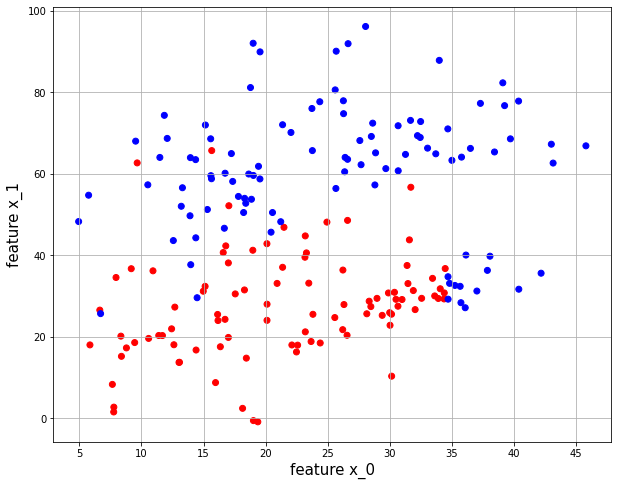

In [5]:

X = df[["age","interest"]].to_numpy()
y = df["success"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.35, 
                                                    random_state=42)

c_train = ["red" if label == 0.0 else "green" for label in y_train]
c_test = ["red" if label == 0.0 else "green" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Next we instantiate an instance of the sklearn.tree.DecisionTreeClassifier model and train the model by calling the fit() method. 

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Now that our model has been trained we can visualize the tree structure of our current model.

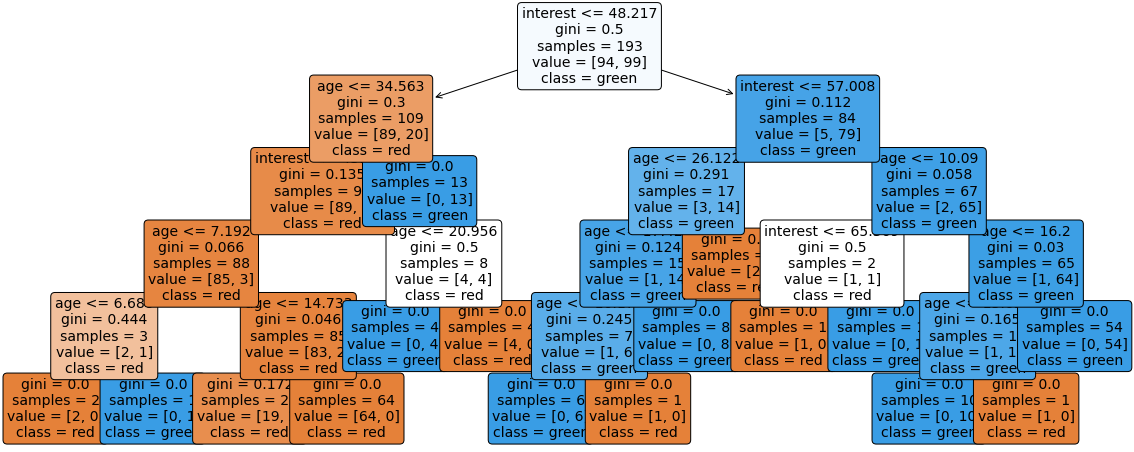

In [10]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["age", "interest"],
                   class_names = ["red", "green"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Show the result of tree by text.

In [11]:
tree_rules = export_text(decision_tree,
                         feature_names = ["age", "interest"])
print(tree_rules, "\n")

|--- interest <= 48.22
|   |--- age <= 34.56
|   |   |--- interest <= 43.25
|   |   |   |--- age <= 7.19
|   |   |   |   |--- age <= 6.69
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- age >  6.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- age >  7.19
|   |   |   |   |--- age <= 14.73
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- age >  14.73
|   |   |   |   |   |--- class: 0.0
|   |   |--- interest >  43.25
|   |   |   |--- age <= 20.96
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  20.96
|   |   |   |   |--- class: 0.0
|   |--- age >  34.56
|   |   |--- class: 1.0
|--- interest >  48.22
|   |--- interest <= 57.01
|   |   |--- age <= 26.12
|   |   |   |--- age <= 17.43
|   |   |   |   |--- age <= 16.18
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- age >  16.18
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- age >  17.43
|   |   |   |   |--- class: 1.0
|   |   |--- age >  26.12
|   |   |   |--- class: 0.0
|   |--- interest >  57.0

In the following cell, we will show the decision boundaries from our trained model.

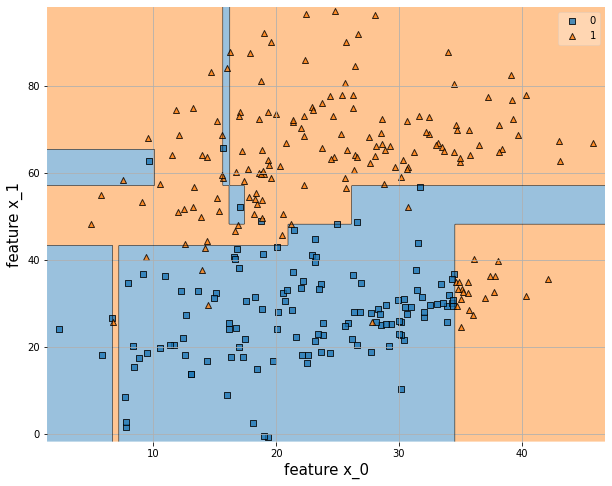

In [14]:
from mlxtend.plotting import plot_decision_regions
y = y.astype(int)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

The boundary looks good! It seems there is no overfit.

As with all machine learning models, we next evaluate our models performance on the testing data.

First, the confusion matrix.

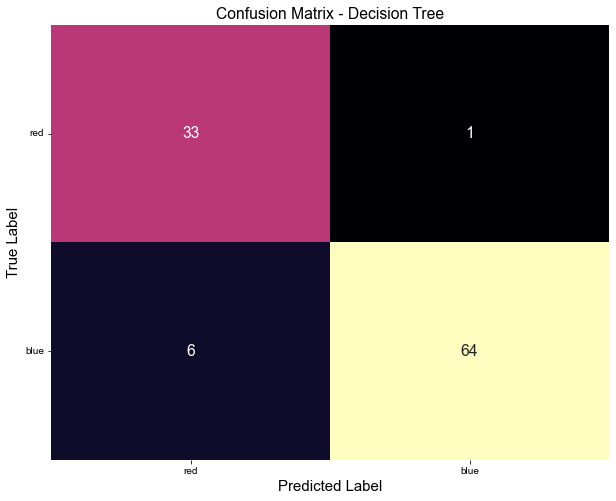

In [15]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

Second, the accuracy scores.

In [16]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90        34
         1.0       0.98      0.91      0.95        70

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



The precision is good!

---

### Implement 2 - Regression Tree

Decision Trees are also capable of performing regression tasks.

For the data, we generate quadratic data with white noise as the dataset.

In [23]:
np.random.seed(6)
m = 240
X = np.random.rand(m, 1)
y = 2 * (X - 0.4) ** 2
wn = np.random.randn(m, 1) / 10
y = y + wn

First, visualization of the generated data.

Text(0.5, 1.0, 'Quadratic + WN')

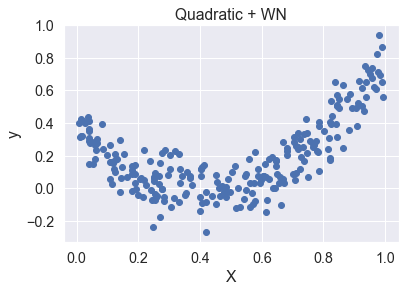

In [24]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Quadratic + WN')

Split the data into training and test set and use DecisionTreeRegressor for the regression tree.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

See the details of the decision tree.

|--- feature_0 <= 0.83
|   |--- feature_0 <= 0.11
|   |   |--- feature_0 <= 0.04
|   |   |   |--- value: [0.35]
|   |   |--- feature_0 >  0.04
|   |   |   |--- value: [0.25]
|   |--- feature_0 >  0.11
|   |   |--- feature_0 <= 0.68
|   |   |   |--- value: [0.05]
|   |   |--- feature_0 >  0.68
|   |   |   |--- value: [0.24]
|--- feature_0 >  0.83
|   |--- feature_0 <= 0.93
|   |   |--- feature_0 <= 0.91
|   |   |   |--- value: [0.51]
|   |   |--- feature_0 >  0.91
|   |   |   |--- value: [0.58]
|   |--- feature_0 >  0.93
|   |   |--- feature_0 <= 0.95
|   |   |   |--- value: [0.67]
|   |   |--- feature_0 >  0.95
|   |   |   |--- value: [0.75]
 



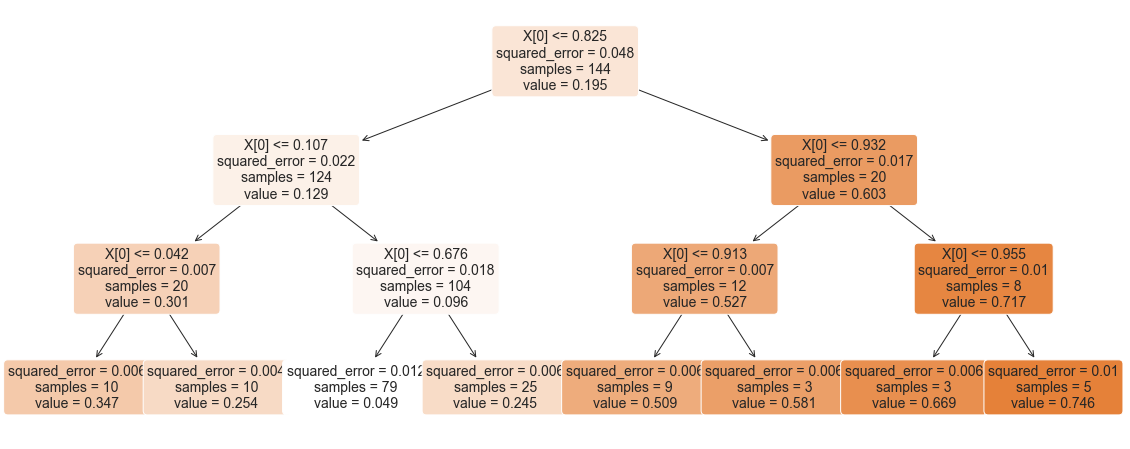

In [30]:
tree_rules = export_text(tree_reg)
print(tree_rules, "\n")

plt.figure(figsize=(20, 8))
a = plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Visualize the predict results.

In [32]:
pred = tree_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, squared=False)

0.10122769983672043

Text(0.5, 1.0, 'Prediction (red) vs True (blue)')

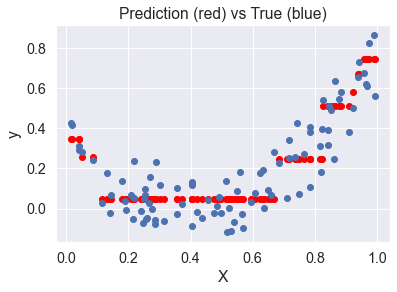

In [33]:
plt.scatter(X_test,pred,c='red')
plt.scatter(X_test,y_test)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Prediction (red) vs True (blue)')

The decision tree model does not look good.